In [7]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)[1:]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label
X.head()

,pregnant,insulin,bmi,age
1,6,0,33.6,50
2,1,0,26.6,31
3,8,0,23.3,32
4,1,94,28.1,21
5,0,168,43.1,33


In [12]:
# split X and y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [15]:
# prediction set
y_pred_class = logreg.predict(X_test)

In [16]:
# accuracy of model
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [17]:
# examine test class
y_test.value_counts()

label
0    130
1     62
Name: count, dtype: int64

In [31]:
# null accuracy, how accurate a model would be if it predicted the more frequent outcome always
M = pd.to_numeric(y_test).mean()
max(M, 1-M)

0.6770833333333333

In [40]:
# print first 25 test and predicted values
print('True:', y_test.to_numpy()[0:25])
print('Pred:', y_pred_class[0:25])

True: ['1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '1' '1' '0' '0' '0']
Pred: ['0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0']


In [42]:
# matrix: TN FP
#         FN TP

print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [49]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [51]:
# classification accuracy = rate of correct predictions = accuracy score (metrics)
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


In [52]:
# classification error = 1 - class accuracy (misclassification rate)
print((FP + FN) / (TP + FP + TN + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


#### Sensitivity (True positives / Positive recall):
When the actual value is positive, how often is the prediction correct?

In [68]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class, pos_label='1'))

0.24193548387096775
0.24193548387096775


#### Specificity: When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting positive instances?

In [70]:
print(TN / (TN + FP))
print(metrics.recall_score(y_test, y_pred_class, pos_label='0'))

0.9076923076923077
0.9076923076923077


#### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [71]:
print(FP / (TN + FP))

0.09230769230769231


#### Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [73]:
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class, pos_label='1'))

0.5555555555555556
0.5555555555555556


#### Which metrics should you focus on?

- Choice of metric depends on your business objective
Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

# Adjusting the classification threshold

In [74]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '1'], dtype=object)

In [75]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [82]:
# probabilities of 1 being the outcome

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438,
       0.35755557, 0.74087965, 0.36050235, 0.23012363, 0.42654231,
       0.19103515, 0.45763601, 0.1190141 , 0.43928953, 0.36961151,
       0.44187989, 0.37611662, 0.19816022, 0.41677304, 0.15548281,
       0.2531671 , 0.09743077, 0.69633712, 0.15358309, 0.2197836 ,
       0.43094832, 0.34216058, 0.22396114, 0.38073543, 0.13342134,
       0.38790216, 0.47049703, 0.16204743, 0.29548176, 0.30918161,
       0.27299705, 0.38816583, 0.27353443, 0.28881041, 0.63471914,
       0.02365251, 0.15820648, 0.23018375, 0.3484593 , 0.27580041,
       0.33264104, 0.24880596, 0.74489512, 0.39001464, 0.41625545,
       0.13575687, 0.18895376, 0.64777682, 0.18922131, 0.05685904,
       0.63991547, 0.46636382, 0.1250972 , 0.26957602, 0.24919104,
       0.30570396, 0.46376224, 0.20963095, 0.42847829, 0.40762264,
       0.20169096, 0.27027066, 0.26255856, 0.57238263, 0.45467

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

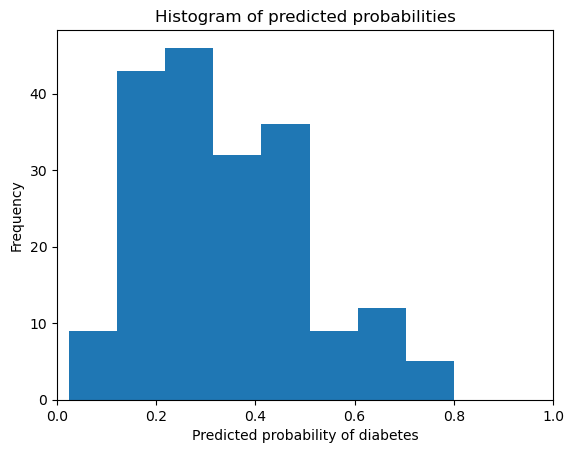

In [83]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

#### Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [84]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [85]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [86]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [87]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [97]:
# new confusion matrix (threshold of 0.3)
y_test = y_test.astype(y_pred_class.dtype)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [98]:
# sensitivity has increased (used to be 0.24)
print(46 / (46 + 16))

0.7419354838709677


In [99]:
# specificity has decreased (used to be 0.91)
print(80 / (80 + 50))

0.6153846153846154


- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship

# ROC Curves and Area Under the Curve (AUC)


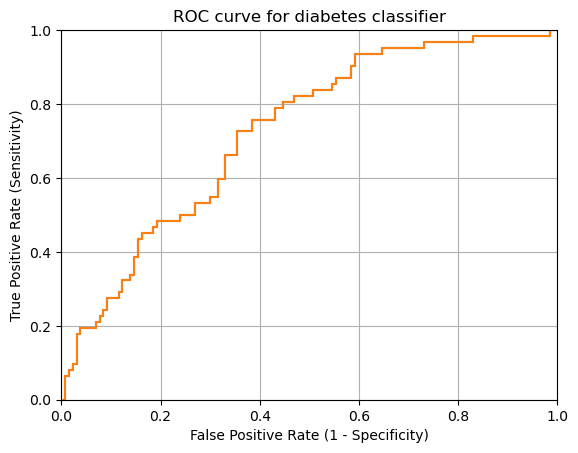

In [101]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [102]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [103]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [104]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


In [105]:
evaluate_threshold(0.2)

Sensitivity: 0.9516129032258065
Specificity: 0.3538461538461538


In [106]:
evaluate_threshold(0.1)

Sensitivity: 0.9838709677419355
Specificity: 0.16923076923076918


In [107]:
evaluate_threshold(0.05)

Sensitivity: 1.0
Specificity: 0.01538461538461533


In [116]:
evaluate_threshold(0.056)

Sensitivity: 1.0
Specificity: 0.01538461538461533


AUC is the percentage of the ROC plot that is underneath the curve:

In [117]:
# area under curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


In [118]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618